## Correlations & Decision Tree Model

## 1. Correlations

Due to the heaviness of data I decided to check correlations between variables, make features

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import dtreeviz

In [2]:
# uploading dataset to juputer notebook
df = pd.read_csv("newdata.csv")

In [3]:
df.head()

age  job  marital  education  failed_previous_credit  balance  \
0   41    9        1          1                       0     1270   
1   42    4        2          2                       0        0   
2   37    9        1          1                       0        1   
3   38    0        2          1                       0      100   
4   30    1        1          1                       0      309   

   housing_loan  loan  contact_type  day_of_week  month  contact_duration_sec  \
0             1     0             2            5      5                  1389   
1             1     1             2            5      5                   562   
2             1     0             2            6      5                   608   
3             1     0             2            7      5                   786   
4             1     0             2            7      5                  1574   

   number_of_contacts  days_since_last_contact  previous_number_of_contacts  \
0                   1                       -1                            0   
1                   2                       -1                            0   
2                   1                       -1                            0   
3                   1                       -1                            0   
4                   2                       -1                            0   

   poutcome  subscribed_deposit  
0         3                   1  
1         3                   1  
2         3                   1  
3         3                   1  
4         3                   1

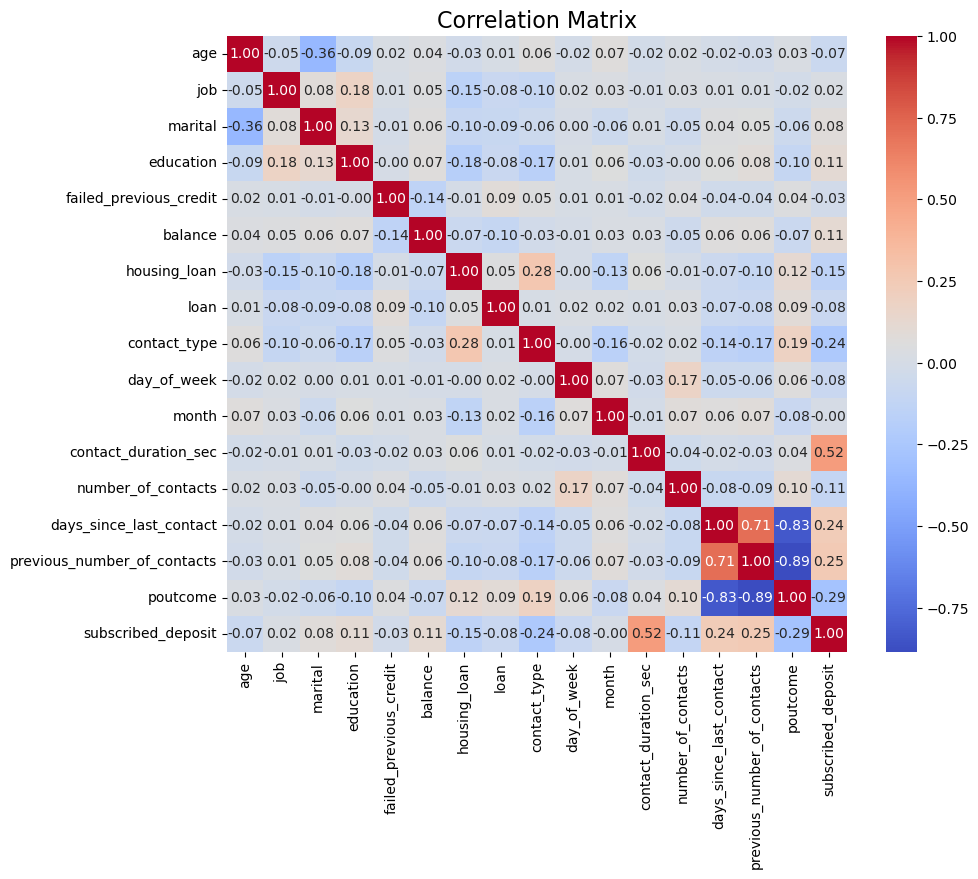

In [4]:
# checking correlations
correlation_matrix = df.corr()

# display the correlation matrix
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Add title
plt.title("Correlation Matrix", fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()

From this matrix we can see that "contact_duration_sec" has 0.52 with the target variable "subscribed_deposit"

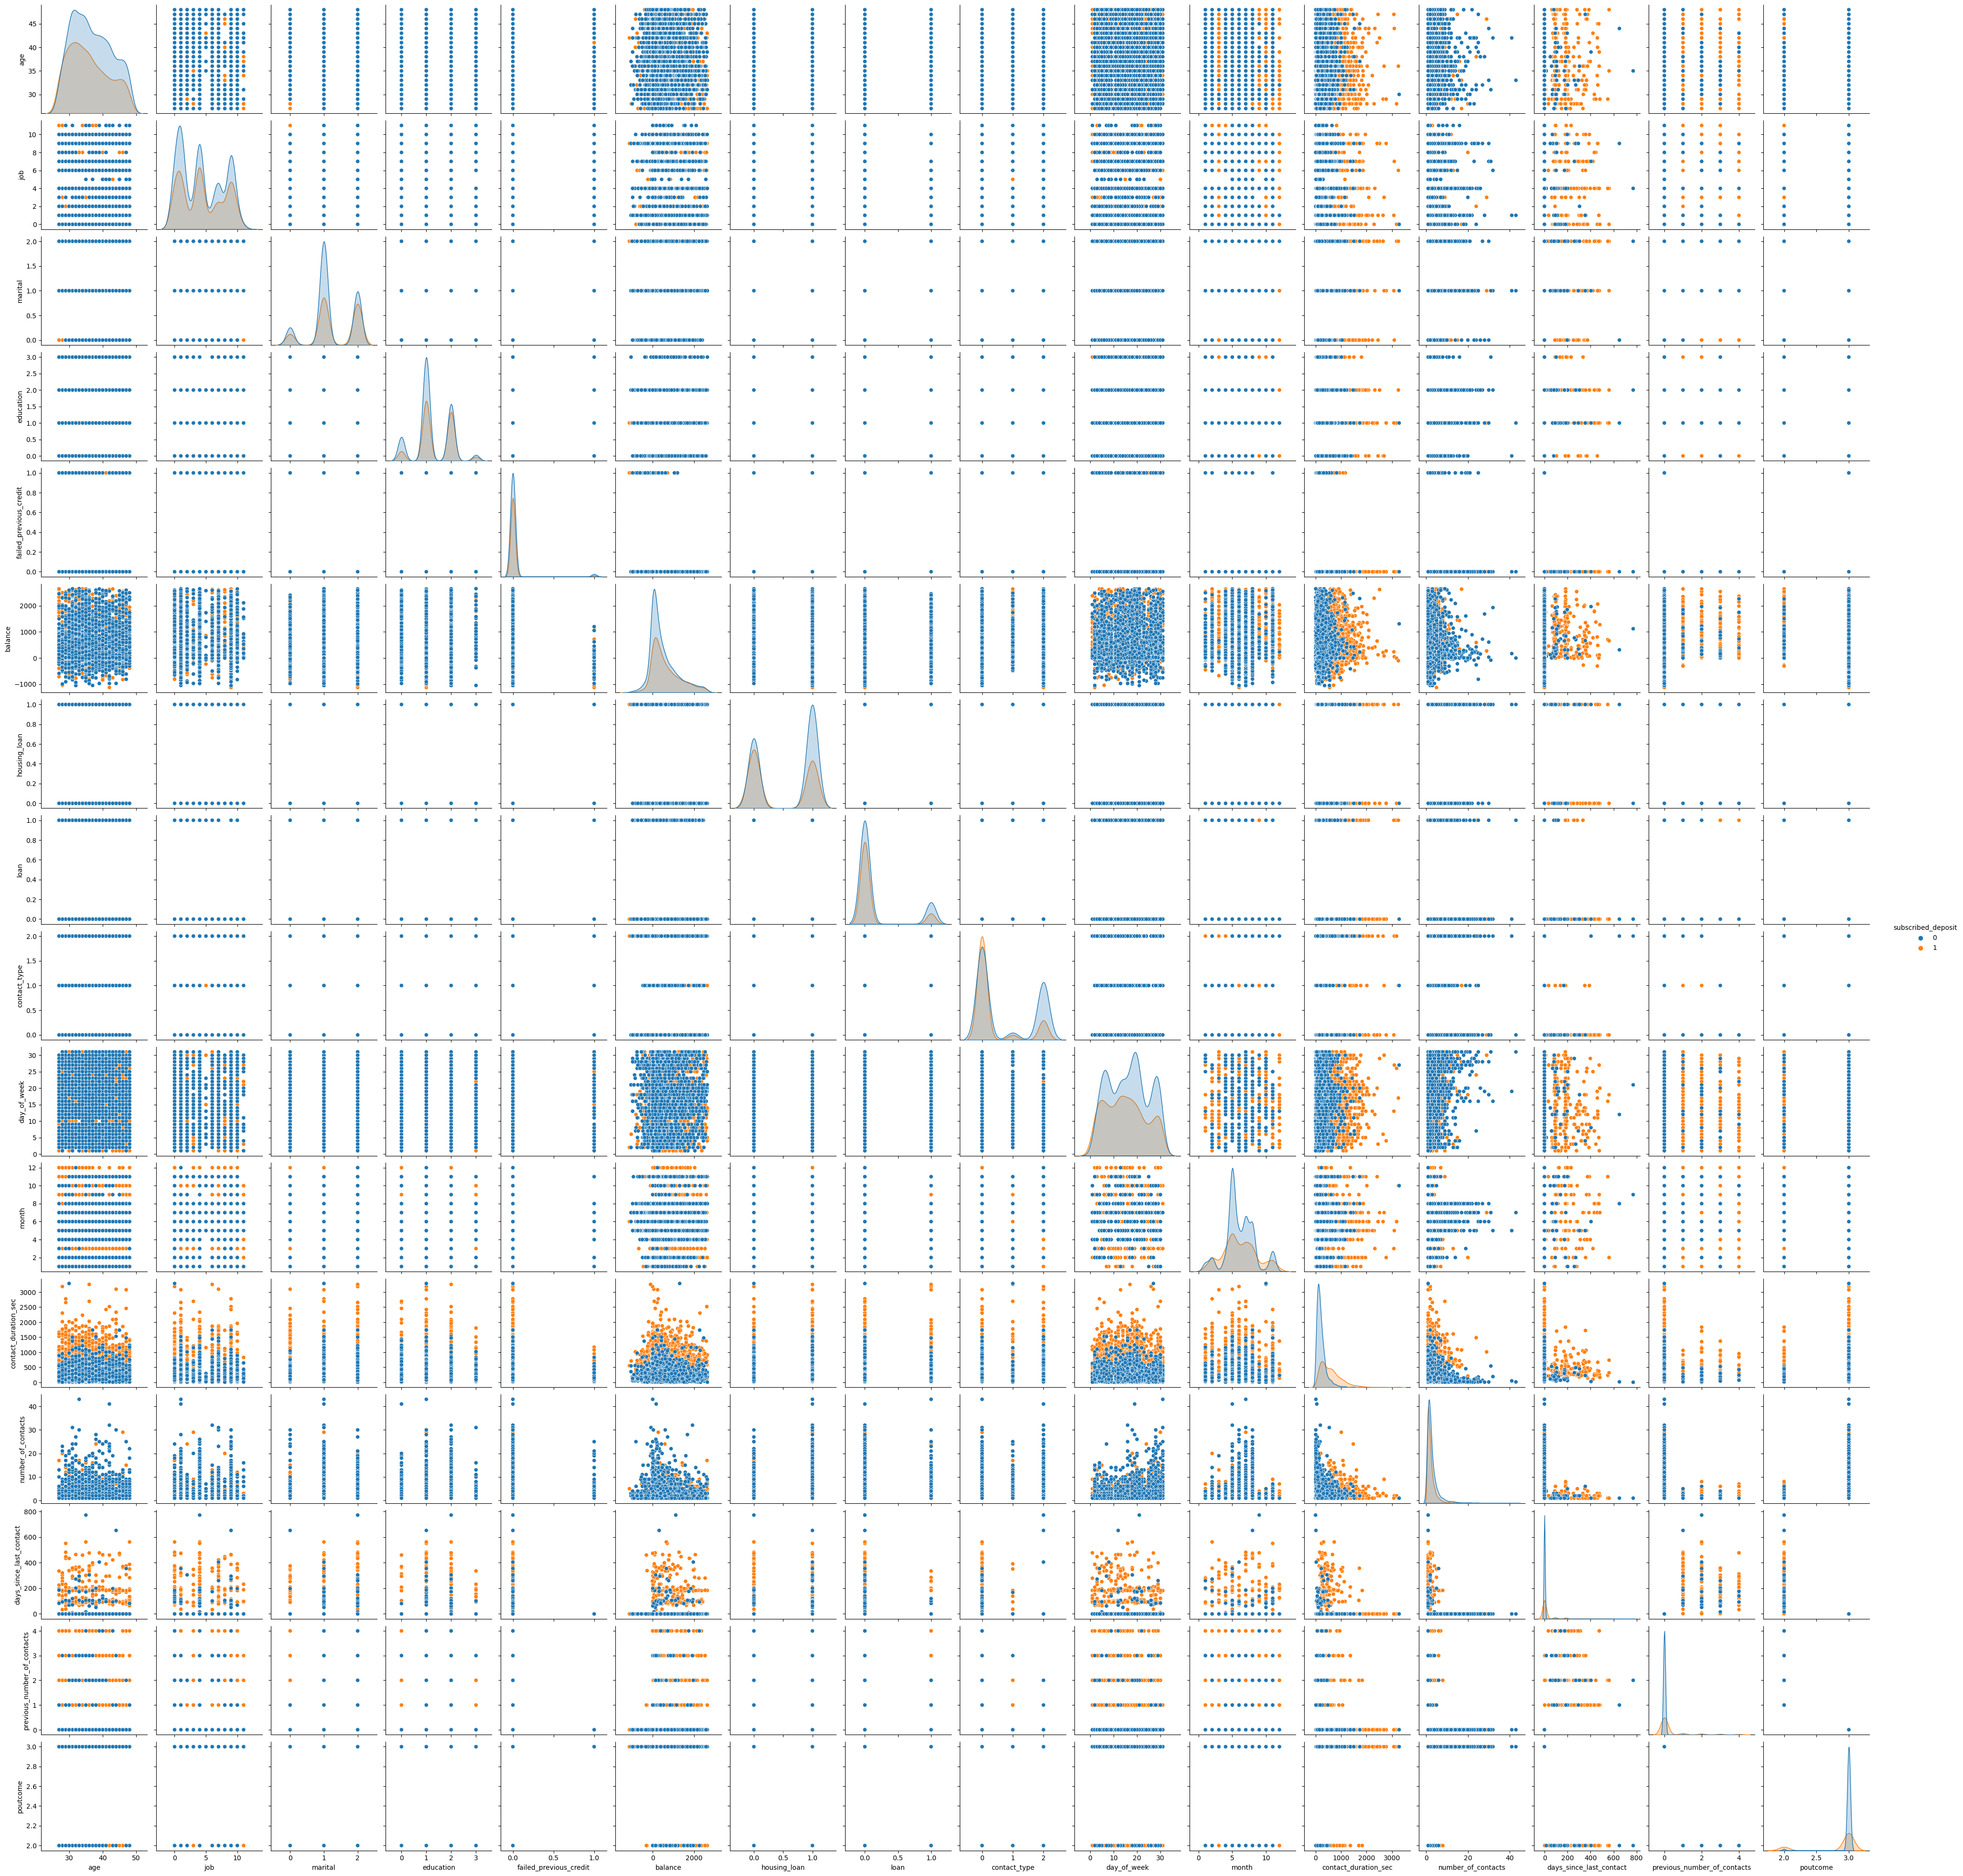

In [5]:
# create and save a pairplot
pairplot =  sns.pairplot(df, vars=df.columns[:-1], hue="subscribed_deposit")
# save the pairplot as a PNG file
pairplot.savefig("pairplot.png") 

We can see some clustering here such as "contact_duration_sec" and "age" or "contact_duration_sec" and "balance"

In [7]:
from scipy.stats import pearsonr

# want to test the correlation between columns 'x' and 'y'
correlation_coefficient, p_value = pearsonr(df['contact_duration_sec'], df['subscribed_deposit'])
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: 0.5155477279065204
P-value: 0.0


In [13]:
import dtale
import dtale.app as dtale_app
dtale.show(df, ignore_duplicate=True, hide_index=True, layout='horizontal')

Using Dtale we can state that these variables affect correlation:
marital
housing_loan
loan (if it is positive)
contact_type
p_outcome

In [10]:
# converting data to X/y
X = df.drop('subscribed_deposit', axis=1)
y = df['subscribed_deposit']

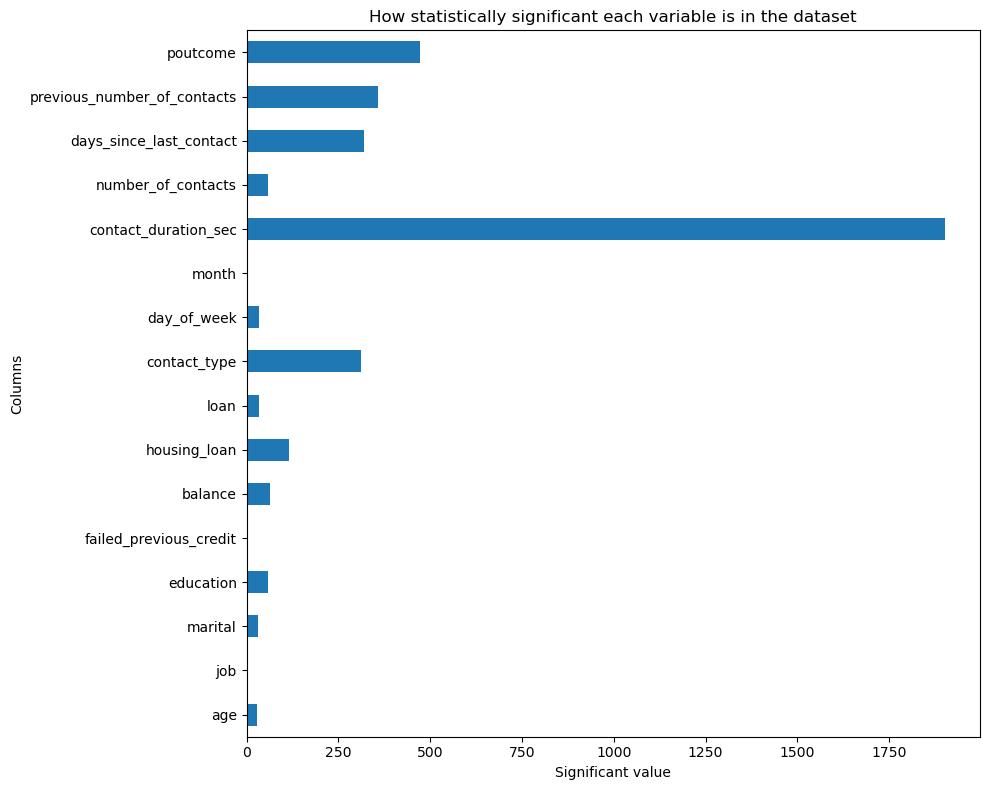

In [11]:
# import the needed module
from sklearn.feature_selection import f_classif

# get the score rankings
f_values, _ = f_classif(X, y)

# Create a pandas Series for easier interpretation
feat_importances = pd.Series(f_values, index=X.columns)

# Plot the ANOVA F-value scores
plt.figure(figsize=(10, 8))  # the figure size
feat_importances.plot(kind='barh')
plt.xlabel('Significant value')
plt.ylabel('Columns')
plt.title('How statistically significant each variable is in the dataset')
plt.tight_layout()  # spacing to prevent overlapping
plt.show()

From this significance chart we understand that the next variables should be taken into consideration while developing the decision tree:
poutcome
previous_number_of_contacts
days_since_last_contact
contact_duration_sec
contact_type

## 1. Decision Tree Model

To sum up, our selected features:
poutcome
contact_duration_sec
contact_type

And maybe we should try to create the second model and see these features:
marital
housing_loan
loan (if it is positive)
previous_number_of_contacts
days_since_last_contact

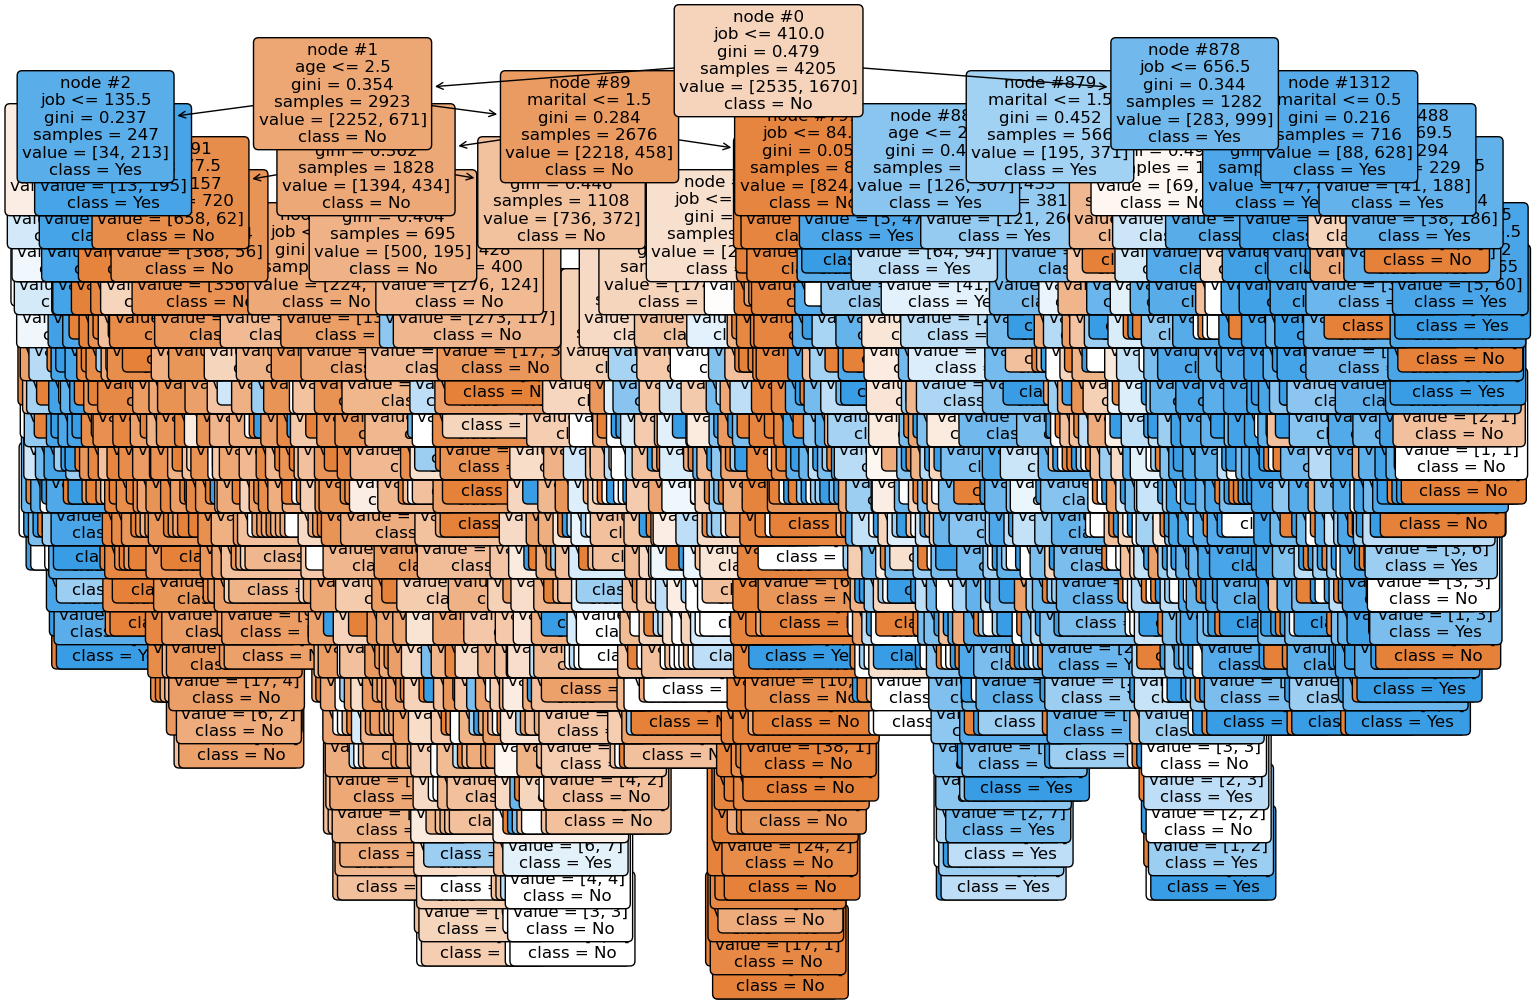

In [18]:
# Step 1: Feature Selection
selected_features = ['poutcome', 'contact_duration_sec', 'contact_type']

# Step 2: Subset Data
X_selected = df[selected_features] 
y = df['subscribed_deposit'] 

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# adjust figsize for a different size
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(model, 
                  feature_names=X.columns,  
                  class_names=["No", "Yes"],
                  filled=True, rounded=True, fontsize=12, node_ids=True
                  )

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Oh wow! It is a mess! Let's try with all variables that I wanted to see in the decision tree

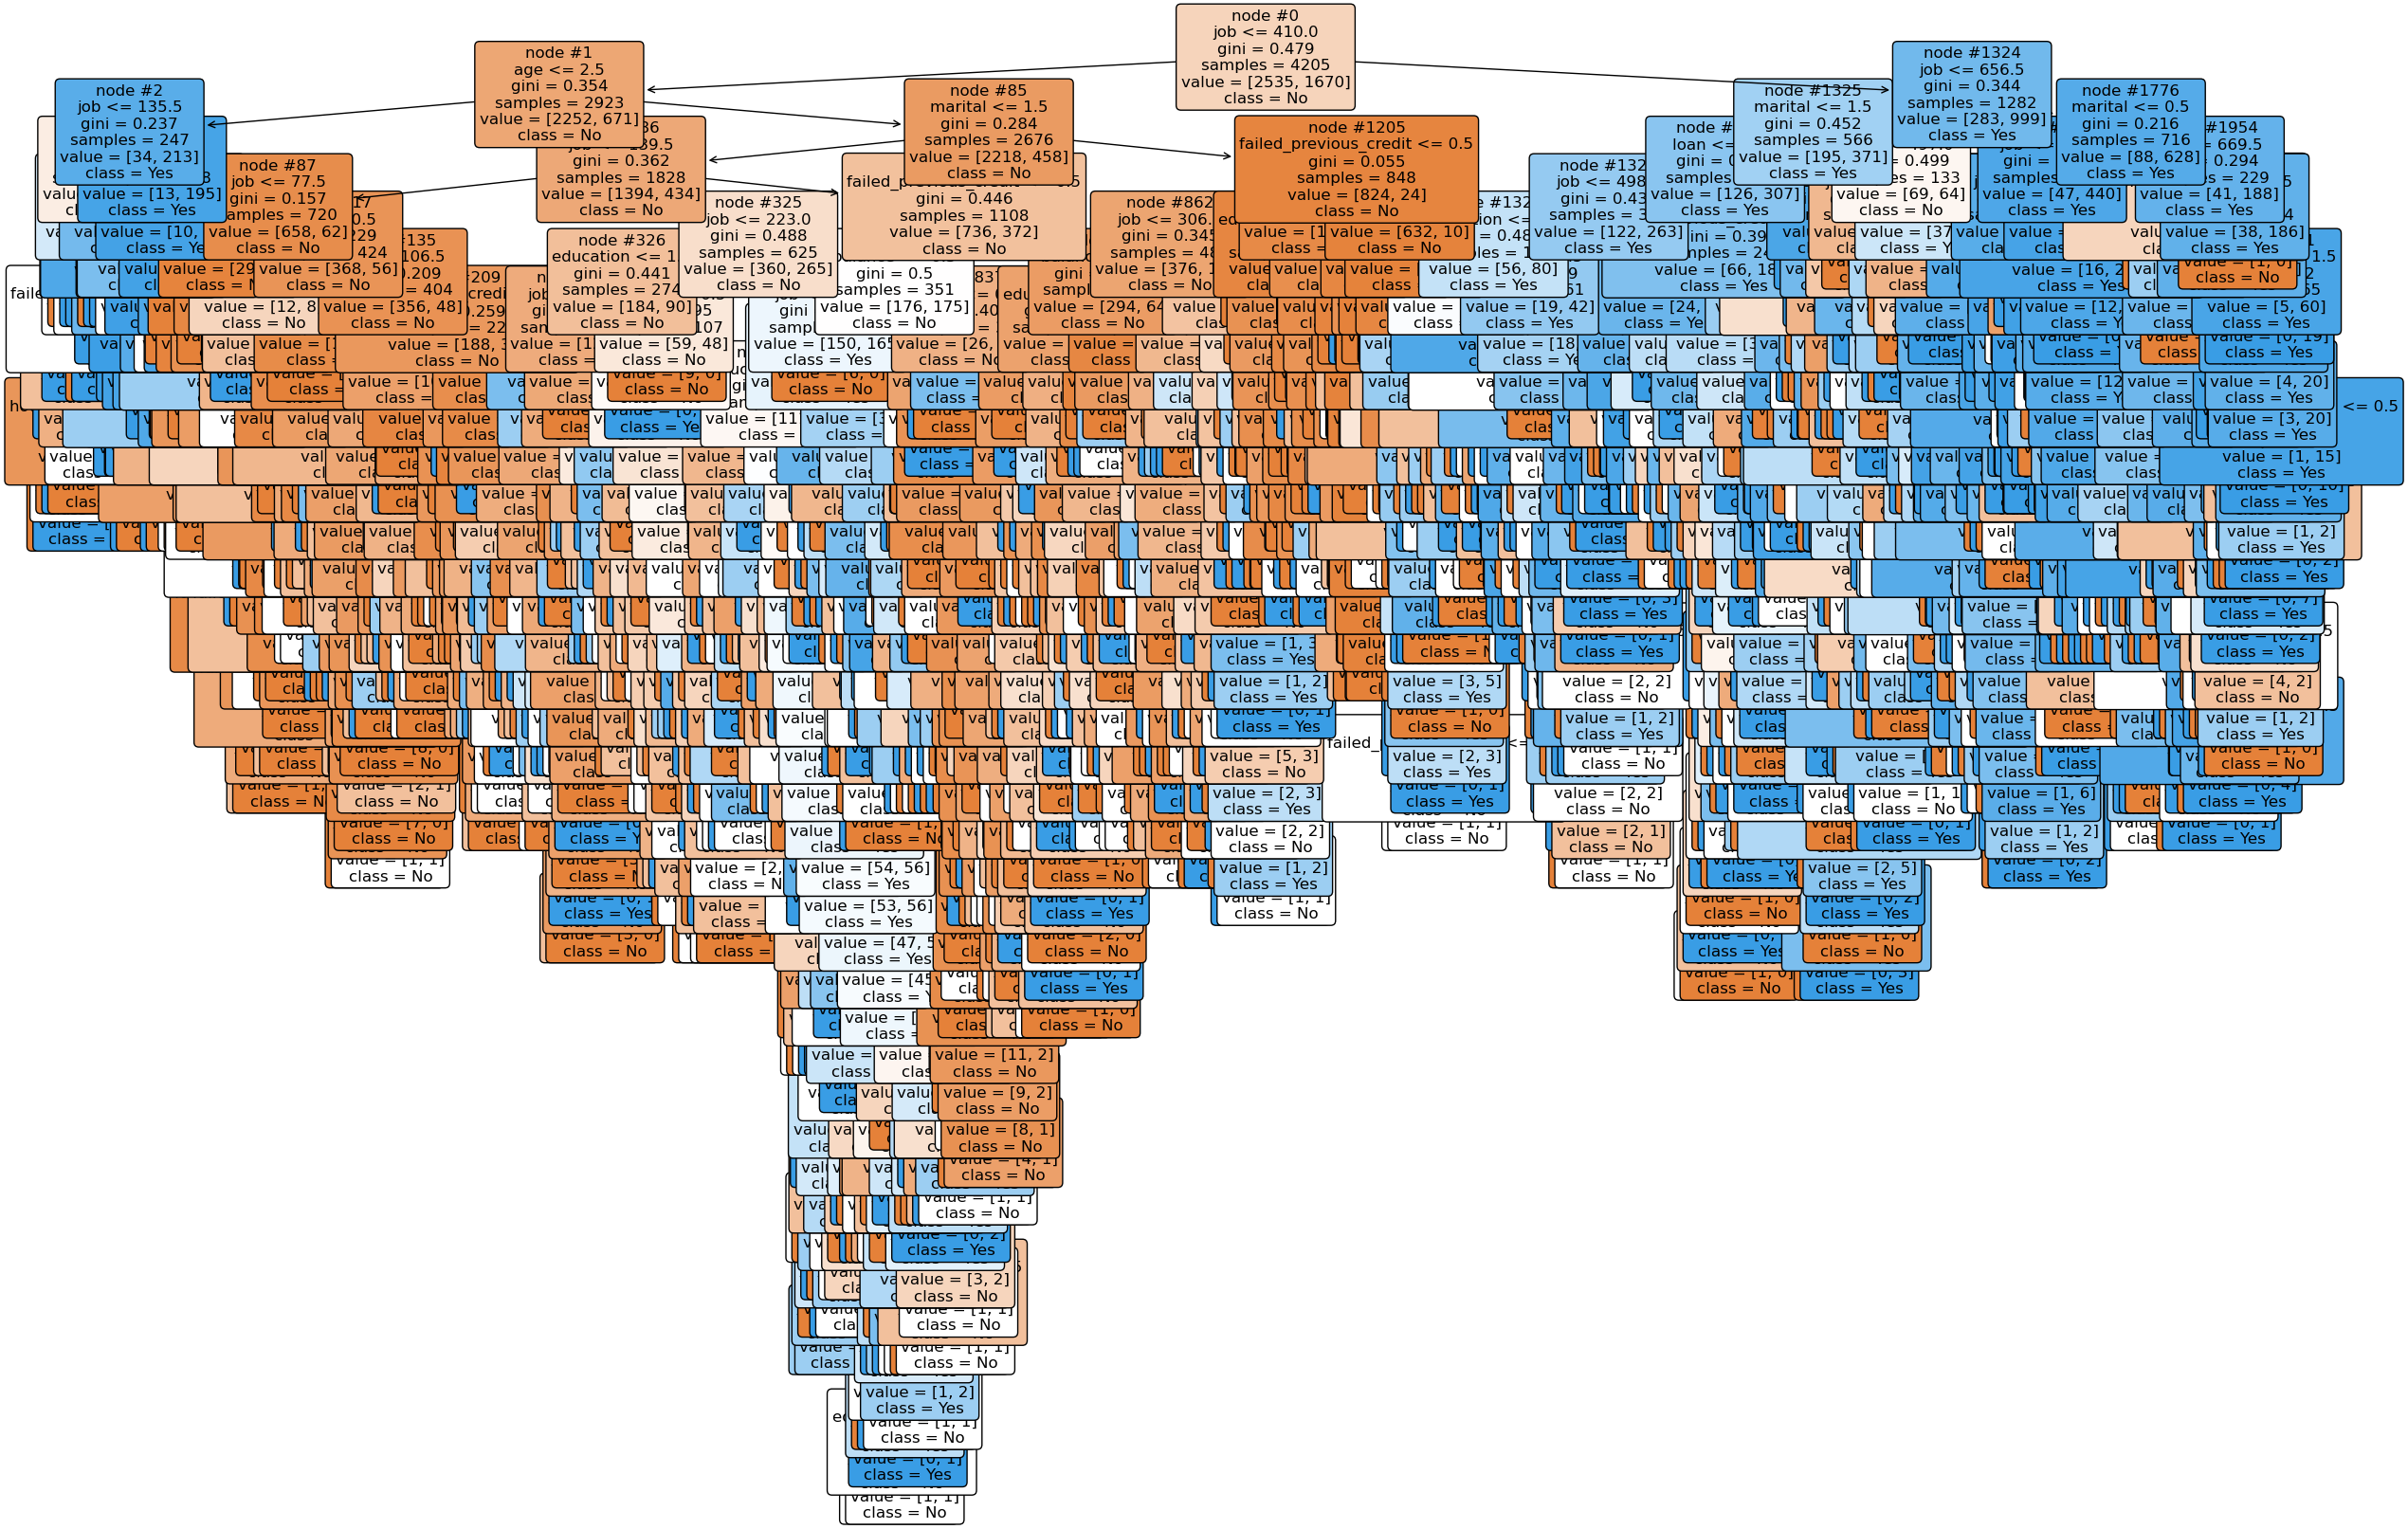

In [22]:
# Step 1: Feature Selection
selected_features = ['poutcome', 'contact_duration_sec', 'contact_type',
                     'marital', 'housing_loan',
                     'loan', 'previous_number_of_contacts',
                     'days_since_last_contact']


# Step 2: Subset Data
X_selected = df[selected_features] 
y = df['subscribed_deposit'] 

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# adjust figsize for a different size
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model, 
                  feature_names=X.columns,  
                  class_names=["No", "Yes"],
                  filled=True, rounded=True, fontsize=12, node_ids=True
                  )

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.8, hspace=0.8)

# Save the figure as an image file
plt.savefig("decision_tree.png")

plt.show()

While it's almost unreadable, we can still discern the root nodes and observe a somewhat clear distribution and clustering, with just a little bit of overlapping.

Some key analysis conclusions:

1. Employment status significantly influences decisions. It makes sense because if someone is a student, there's a lower probability that they'll take a loan.
2. Not having a current loan likely makes it more challenging to decide to take out a new one.
3. Being single reduces the likelihood of considering a loan.

In fact, I believe this decision tree could be incredibly useful for identifying target audiences and developing a more efficient marketing strategy.